## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme, geom_text

In [116]:
heart_data = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")

print(heart_data.head())

                       Name  age  sex  cp  trtbps  chol  restecg  thalach  \
0           Magnolia Cassin   60    1   1     117   230        1      160   
1     Dr. Cathern Heathcote   60    0   3     102   318        1      160   
2                Miles Wolf   62    0   3     130   263        1       97   
3             Mikaila Block   43    1   1     115   303        1      181   
4  Mrs. Jacquline Marquardt   66    1   1     120   302        0      151   

    diagnosis  
0  No Disease  
1     Disease  
2  No Disease  
3     Disease  
4     Disease  


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [117]:
X = heart_data[['age', 'chol']]
y = heart_data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Confusion Matrix:
[[15  9]
 [10  7]]
Classification Report:
              precision    recall  f1-score   support

     Disease       0.60      0.62      0.61        24
  No Disease       0.44      0.41      0.42        17

    accuracy                           0.54        41
   macro avg       0.52      0.52      0.52        41
weighted avg       0.53      0.54      0.53        41



In [118]:
intercept_log = model.intercept_[0]
beta_age_log = model.coef_[0][0]
beta_chol_log = model.coef_[0][1]

threshold = 0.5

chol_level = (np.log(threshold / (1 - threshold)) - intercept_log - beta_age_log * 55) / beta_chol_log

print(f"The cholesterol level for 55 year old: {chol_level}")

The cholesterol level for 55 year old: 308.20302740651636


In [119]:
threshold = 0.9

chol_level = (np.log(threshold / (1 - threshold)) - intercept_log - beta_age_log * 55) / beta_chol_log

print(f"The cholesterol level for 55 year old with 90% chance that heart disease is present: {chol_level}")

The cholesterol level for 55 year old with 90% chance that heart disease is present: 1084.0659242242277


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [120]:
lda_model = LinearDiscriminantAnalysis()

lda_model.fit(X_train, y_train)

y_pred = lda_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Confusion Matrix:
[[15  9]
 [10  7]]
Classification Report:
              precision    recall  f1-score   support

     Disease       0.60      0.62      0.61        24
  No Disease       0.44      0.41      0.42        17

    accuracy                           0.54        41
   macro avg       0.52      0.52      0.52        41
weighted avg       0.53      0.54      0.53        41



In [121]:
intercept_lda = lda_model.intercept_[0]
beta_age_lda = lda_model.coef_[0][0]
beta_chol_lda = lda_model.coef_[0][1]

chol_at_boundary = -(intercept_lda + beta_age_lda * 55) / beta_chol_lda

print(f"The cholesterol level for 55 year old: {chol_at_boundary}")

The cholesterol level for 55 year old: 310.01184093699123


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [122]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svc_model = SVC(kernel='linear')

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_est = grid_search.best_estimator_

final_svc_model = SVC(C=best_params['C'])
final_svc_model.fit(X_train_scaled, y_train)

y_pred = final_svc_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Best Parameters: {'C': 1}
Confusion Matrix:
[[14 10]
 [ 9  8]]
Classification Report:
              precision    recall  f1-score   support

     Disease       0.61      0.58      0.60        24
  No Disease       0.44      0.47      0.46        17

    accuracy                           0.54        41
   macro avg       0.53      0.53      0.53        41
weighted avg       0.54      0.54      0.54        41



In [123]:
best_est = grid_search.best_estimator_
best_est

SVC(C=1, kernel='linear')

In [124]:
intercept_svc = best_est.intercept_[0]
beta_age_svc = best_est.coef_[0][0]
beta_chol_svc = best_est.coef_[0][1]

chol_at_boundary = (intercept_svc + beta_age_svc * 55) / beta_chol_svc
print(f"The cholesterol level for 55 year old: {chol_at_boundary}")


The cholesterol level for 55 year old: 162.4330046117529


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

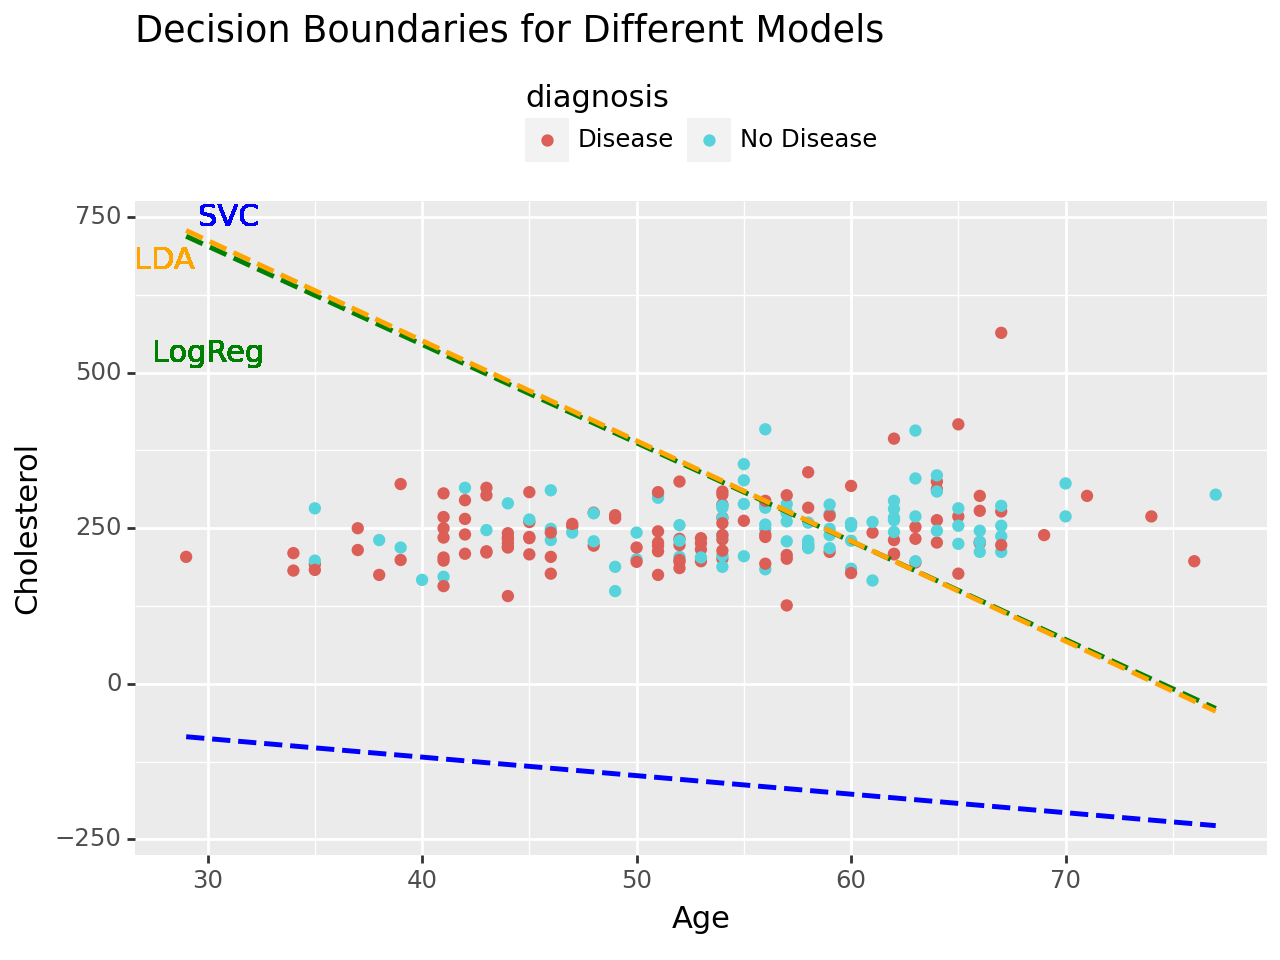

In [125]:
plot = (ggplot(heart_data, aes(x='age', y='chol', color='diagnosis')) +
        geom_point() +
        labs(title='Decision Boundaries for Different Models', x='Age', y='Cholesterol') +
        theme(legend_position='top'))

age_range = np.linspace(heart_data['age'].min(), heart_data['age'].max(), 100)

chol_log = (-intercept_log - beta_age_log * age_range) / beta_chol_log
log_reg_line = pd.DataFrame({'age': age_range, 'chol': chol_log})

chol_lda = (-intercept_lda - beta_age_lda * age_range) / beta_chol_lda
lda_line = pd.DataFrame({'age': age_range, 'chol': chol_lda})

chol_svc = (-intercept_svc - beta_age_svc * age_range) / beta_chol_svc
svc_line = pd.DataFrame({'age': age_range, 'chol': chol_svc})

plot += geom_line(data=log_reg_line, linetype='dashed', color='green', size=1)
plot += geom_line(data=lda_line, linetype='dashed', color='orange', size=1)
plot += geom_line(data=svc_line, linetype='dashed', color='blue', size=1)


plot += geom_text(x=30, y=530, label="LogReg", color="green")
plot += geom_text(x=28, y=680, label="LDA", color="orange")
plot += geom_text(x=31, y=750, label="SVC", color="blue")

print(plot)